In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, bernoulli, binom, poisson, uniform

In [3]:
from google.colab import files
uploaded=files.upload()

Saving sm.csv to sm.csv


In [12]:
df=pd.read_csv('sm.csv',sep='|', skiprows=[18])
df = df.iloc[1:]
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')
df

,Unnamed:_0,Branch,City,Customer_type,Gender,Unit_price,Quantity,Tax_5%,Total,Unnamed:_9
1,NaN,A,Yangon,Member,Female,74.69,7,26.1415,548.9715,NaN
2,NaN,C,Naypyitaw,Normal,Female,15.28,5,3.82,80.22,NaN
3,NaN,A,Yangon,Normal,Male,46.33,7,16.2155,340.5255,NaN
4,NaN,A,Yangon,Member,Male,58.22,8,23.288,489.048,NaN
5,NaN,A,Yangon,Normal,Male,86.31,7,30.2085,634.3785,NaN
6,NaN,C,Naypyitaw,Normal,Male,85.39,7,29.8865,627.6165,NaN
7,NaN,A,Yangon,Member,Female,68.84,6,20.652,433.692,NaN
8,NaN,C,Naypyitaw,Normal,Female,73.56,10,36.78,772.38,NaN
9,NaN,A,Yangon,Member,Female,36.26,2,3.626,76.146,NaN
10,NaN,B,Mandalay,Member,Female,54.84,3,8.226,172.746,NaN


In [13]:
df.head()

,Unnamed:_0,Branch,City,Customer_type,Gender,Unit_price,Quantity,Tax_5%,Total,Unnamed:_9
1,NaN,A,Yangon,Member,Female,74.69,7,26.1415,548.9715,NaN
2,NaN,C,Naypyitaw,Normal,Female,15.28,5,3.82,80.22,NaN
3,NaN,A,Yangon,Normal,Male,46.33,7,16.2155,340.5255,NaN
4,NaN,A,Yangon,Member,Male,58.22,8,23.288,489.048,NaN
5,NaN,A,Yangon,Normal,Male,86.31,7,30.2085,634.3785,NaN


In [14]:
n_c=[]
for col in df.columns:
    df[col]=pd.to_numeric(df[col],errors='coerce')
    if np.issubdtype(df[col].dtype, np.number):
      n_c.append(col)
print(n_c)

['Unnamed:_0', 'Branch', 'City', 'Customer_type', 'Gender', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Unnamed:_9']


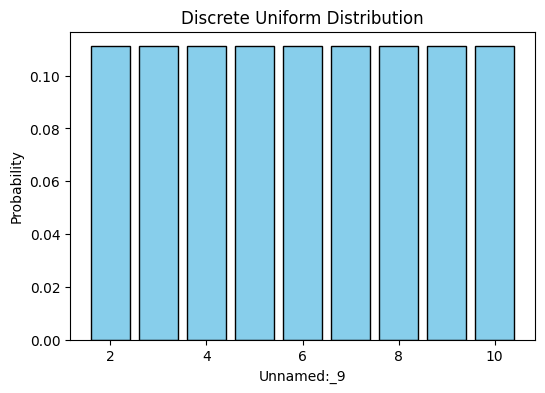

In [16]:
#discrete uniform distribution
# Using 'Quantity' column as an example since n_c might be empty initially
plt.figure(figsize=(6,4))
values = np.arange(int(min(data)), int(max(data))+1)
prob = [1/len(values)] * len(values)
plt.bar(values, prob, color='skyblue', edgecolor='black')
plt.title("Discrete Uniform Distribution")
plt.xlabel(col)
plt.ylabel("Probability")
plt.show()

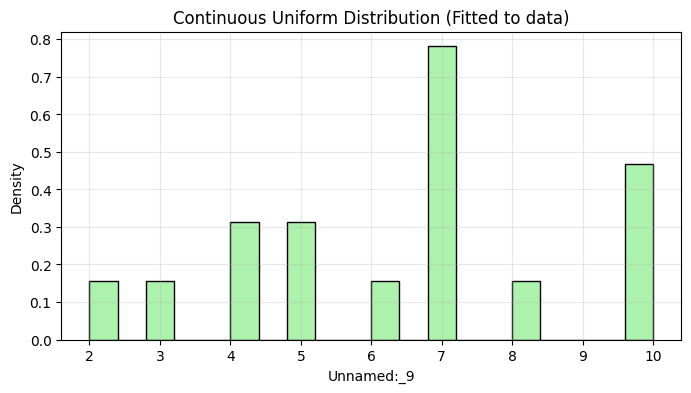

In [17]:
#continuous uniform distribution
plt.figure(figsize=(8,4))
sns.histplot(data, kde=False, color='lightgreen', stat='density', bins=20)
plt.title("Continuous Uniform Distribution (Fitted to data)")
plt.xlabel(col)
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.show()

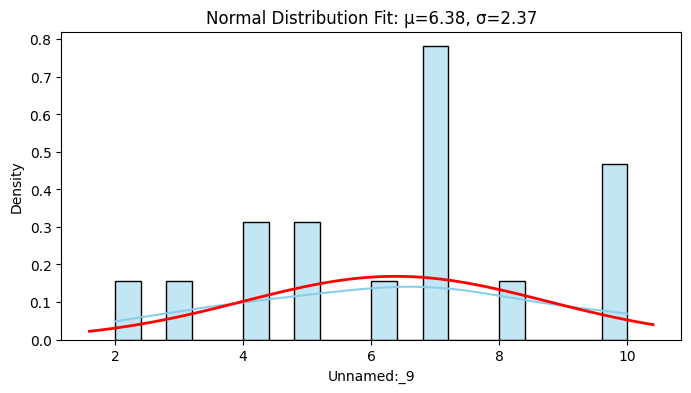

In [18]:
#normal distribution
mu, sigma = norm.fit(data)
plt.figure(figsize=(8,4))
sns.histplot(data, bins=20, kde=True, color='skyblue', stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f"Normal Distribution Fit: μ={mu:.2f}, σ={sigma:.2f}")
plt.xlabel(col)
plt.ylabel("Density")
plt.show()

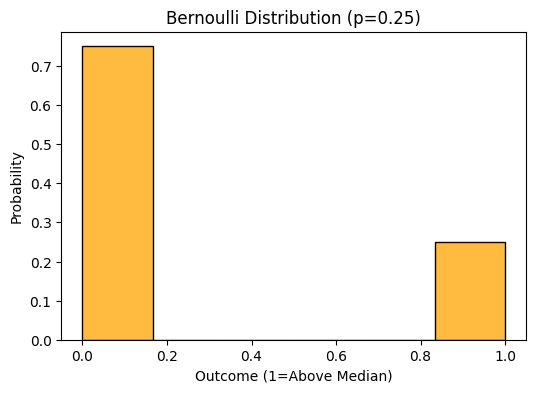

In [19]:
#bernaulli distribution
median_value = np.median(data)
binary_data = (data > median_value).astype(int)
p_hat = np.mean(binary_data)
plt.figure(figsize=(6,4))
sns.histplot(binary_data, kde=False, color='orange', stat='probability')
plt.title(f"Bernoulli Distribution (p={p_hat:.2f})")
plt.xlabel("Outcome (1=Above Median)")
plt.ylabel("Probability")
plt.show()

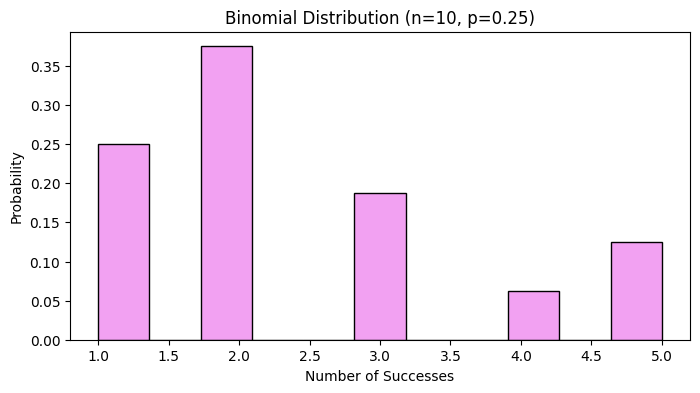

In [20]:
#Binomial distribution
n = 10
p = p_hat
binom_data = binom.rvs(n=n, p=p, size=len(data))
plt.figure(figsize=(8,4))
sns.histplot(binom_data, kde=False, color='violet', stat='probability', bins=n+1)
plt.title(f"Binomial Distribution (n={n}, p={p:.2f})")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()

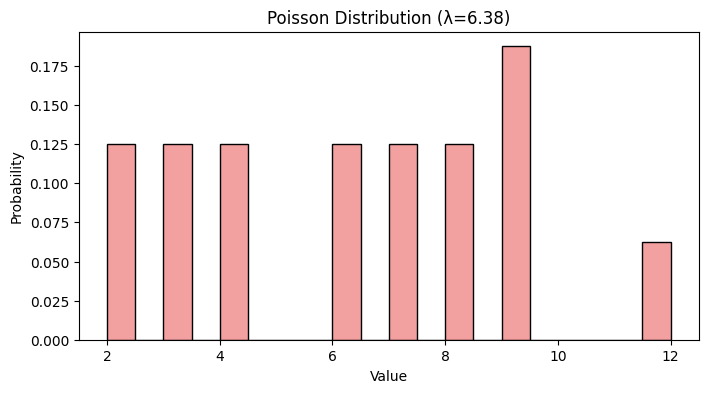

In [21]:
#Poisson distribution
lambda_hat = np.mean(data)
poisson_data = poisson.rvs(mu=lambda_hat, size=len(data))
plt.figure(figsize=(8,4))
sns.histplot(poisson_data, kde=False, color='lightcoral', stat='probability', bins=20)
plt.title(f"Poisson Distribution (λ={lambda_hat:.2f})")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.show()